# Datos Surface temperature anomaly

The GISS Surface Temperature Analysis version 4 (GISTEMP v4) is an estimate of global surface temperature change. Graphs and tables are updated around the middle of every month using current data files from NOAA GHCN v4 (meteorological stations) and ERSST v5 (ocean areas)

The Extended Reconstructed Sea Surface Temperature (ERSST) dataset is a global monthly analysis of SST data derived from the International Comprehensive Ocean–Atmosphere Dataset (ICOADS).

* Mensuales
* Periodo 1880-01 a 2022-12
* Compressed NetCDF Files (regular 2°×2° grid)
* Fuente: https://data.giss.nasa.gov/gistemp/
* Fuente: https://www.ncei.noaa.gov/products/extended-reconstructed-sst

# Área Niño 3-4

El área Niño 3.4, también conocida como región del Pacífico Central, se utiliza para monitorear las condiciones del fenómeno El Niño-Oscilación del Sur (ENSO). Las coordenadas geográficas aproximadas del área Niño 3.4 son:

* Latitud: Entre 5°N y 5°S
* Longitud: Entre 170°W y 120°W

Estas coordenadas del área Niño 3.4 cubren una región específica en el océano Pacífico, cerca de la línea ecuatorial y a lo largo de la costa de América del Sur. Es una de las áreas clave que se monitorean para determinar las condiciones de El Niño y La Niña, y su temperatura superficial del mar se utiliza para evaluar los patrones climáticos y las anomalías de temperatura en la región.

#  Importación de librerías 

In [1]:
%matplotlib inline
%config IPCompleter.greedy=True #This command enables the "greedy" mode for the IPython completer, which means that it will automatically display all possible completions when the user presses the Tab key, without waiting for further input

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil # para evitar banda blanca vertical en greenwich
import xarray as xr
import cartopy
import cartopy.mpl.ticker as cticker
import matplotlib.cm as cm

from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import datetime
import scipy.stats as scp

gistemp=Dataset('gistemp1200_GHCNv4_ERSSTv5.nc','r')
print (gistemp.variables)

{'lat': <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
unlimited dimensions: 
current shape = (90,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time': <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: time
    units: days since 1800-01-01 00:00:00
    bounds: time_bnds
unlimited dimensions: 
current shape = (1716,)
filling on, default _FillValue of -2147483647 used, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
int32 time_bnds(time, nv)
unlimited dimensions: 
current shape = (1716, 2)
filling on, default _FillValue of -2147483647 used, 'tempanomaly': <class 'netCDF4._netCDF4.Variable'>
int16 tempanomaly(time, lat, lon)
    

In [2]:
# Se extraen los datos del archivo netcdf4
tempanomaly = np.array (gistemp.variables['tempanomaly'][:])
# Eliminar los datos faltantes en la matriz de temperatura (nan)
tempanomaly[tempanomaly==32767]=np.nan
lat = np.array (gistemp.variables['lat'][:])
lon = np.array (gistemp.variables['lon'][:])
# Se crea un arreglo de tiempo y se convierte a float con astype()
time= np.array (gistemp.variables['time'][:]).astype(float) # convierte a float el arreglo time para aplicarle timedelta, si no se pone float genera error timedelta
# Se crea el arreglo de fechas con formato datetime a partir del arreglo time que tiene dias como floats desde 1800-01-01-00:00:00
fechas = np.array([datetime.datetime(1800,1,1) + datetime.timedelta(days = time[i]) for i in range(len(time))])

In [3]:
lat

array([-89., -87., -85., -83., -81., -79., -77., -75., -73., -71., -69.,
       -67., -65., -63., -61., -59., -57., -55., -53., -51., -49., -47.,
       -45., -43., -41., -39., -37., -35., -33., -31., -29., -27., -25.,
       -23., -21., -19., -17., -15., -13., -11.,  -9.,  -7.,  -5.,  -3.,
        -1.,   1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.,
        21.,  23.,  25.,  27.,  29.,  31.,  33.,  35.,  37.,  39.,  41.,
        43.,  45.,  47.,  49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,
        65.,  67.,  69.,  71.,  73.,  75.,  77.,  79.,  81.,  83.,  85.,
        87.,  89.], dtype=float32)

In [4]:
lon

array([-179., -177., -175., -173., -171., -169., -167., -165., -163.,
       -161., -159., -157., -155., -153., -151., -149., -147., -145.,
       -143., -141., -139., -137., -135., -133., -131., -129., -127.,
       -125., -123., -121., -119., -117., -115., -113., -111., -109.,
       -107., -105., -103., -101.,  -99.,  -97.,  -95.,  -93.,  -91.,
        -89.,  -87.,  -85.,  -83.,  -81.,  -79.,  -77.,  -75.,  -73.,
        -71.,  -69.,  -67.,  -65.,  -63.,  -61.,  -59.,  -57.,  -55.,
        -53.,  -51.,  -49.,  -47.,  -45.,  -43.,  -41.,  -39.,  -37.,
        -35.,  -33.,  -31.,  -29.,  -27.,  -25.,  -23.,  -21.,  -19.,
        -17.,  -15.,  -13.,  -11.,   -9.,   -7.,   -5.,   -3.,   -1.,
          1.,    3.,    5.,    7.,    9.,   11.,   13.,   15.,   17.,
         19.,   21.,   23.,   25.,   27.,   29.,   31.,   33.,   35.,
         37.,   39.,   41.,   43.,   45.,   47.,   49.,   51.,   53.,
         55.,   57.,   59.,   61.,   63.,   65.,   67.,   69.,   71.,
         73.,   75.,

In [5]:
fechas

array([datetime.datetime(1880, 1, 15, 0, 0),
       datetime.datetime(1880, 2, 15, 0, 0),
       datetime.datetime(1880, 3, 15, 0, 0), ...,
       datetime.datetime(2022, 10, 15, 0, 0),
       datetime.datetime(2022, 11, 15, 0, 0),
       datetime.datetime(2022, 12, 15, 0, 0)], dtype=object)

# Creación de listas vacías para estadísticos

Se crean listas vacias para posteriormente llenarlas con los estadísticos Media, Mediana, desv std etc

In [6]:
NoNaN          = []
Mean           = []
Median         = []
desv           = []
perc_25        = []
perc_75        = []
kurt           = []
Media_Norte    = []
Mediana_Norte  = []
Media_Sur      = []
Mediana_Sur    = []
Media_Nino34   = []
Mediana_Nino34 = []

# Coordenadas hemisferio sur, norte y zona Niño 3-4

Usando la función de numpy 'where' se definen las posiciones donde se cumple que el array de lats y lons coinciden con el recuadro de las ubicaciones buscadas

In [7]:
Sur            = np.where(lat < 0)[0]
Norte          = np.where(lat >= 0)[0]
Nino_34_Lat    = np.where((lat > -5) & (lat < 5))[0]
Nino_34_Lon    = np.where((lon > -170) & (lon < -120))[0]

# Cálculo estadísticos

* Cada iteración del ciclo for toma el i-ésimo mapa que corresponde a la i-ésima fecha usando el arreglo time. Cada iteración lo que hace es calcular el estadístico de manera ESPACIAL, es decir que si por ejemplo calcula la media sur, esta corresponde al promedio espacial de los datos en una fecha concreta en el hemisferio sur, es decir el promedio espacial por ejemplo en 1988-03. 
* Eso arroja un dato y ese dato es el promedio de temperatura para el hemisferio sur en el mes de marzo del año 1988. Así sucesivamente va construyendo iteración tras iteración una serie de DATOS ESTADÍSTICOS ESPACIALES EN EL TIEMPO, un dato por cada mapa y cada fecha.

In [8]:
for i in range(len(time)):               # range(len(time)) == i toma valores en el rango 0,1,2,3..........,1715. Esto implica que i recorre todos los meses almacenado en los datos del NetCDF
    Mapa = tempanomaly[i,:,:]            # cuando i= 0, se define la primer 'tajada del pan' == tempanomaly[0,:,:], es decir los datos son un arreglo tridimensional segmentado en tajadas, cada tajada del pan es un mapa, por ejemplo i=0 corresponde al primer mapa de los datos y asi sucesivamente hasta recorrer los 1715 mapas o tajadas del pan
    Mapa_NoNaN = Mapa[np.isfinite(Mapa)] # np.isfinite(Mapa) es un arreglo de booleanos que luego es evaluado dentro de Mapa[np.isfinite(Mapa)] para seleccionar un nuevo arreglo o mapa (llamdo Mapa_NoNaN), donde se seleccionan las posiciones que son numeros finitos, es decir se evitan los NaNs y los infinitos del arreglo Mapa
    NoNaN.append(len(Mapa_NoNaN))        # almacena en la lista 'NoNaN' la cantidad de pixeles de cada tajada o mapa que no son nan, cada valor en la lista de 'NoNaN' indica el numero de pixeles que no tienen datos NaN por cada mapa[i,:,:]
    Mean.append(np.mean(Mapa_NoNaN))     # almacena en la lista 'Mean' el promedio espacial de los pixeles del iésimo Mapa_NoNaN[i,:,:]. Es decir que cada elemento en la lista 'Mean' indica el promedio espacial del Mapa_NoNaN[i,:,:]. Como se tienen 1715 mapas o tajadas mensuales, la lista 'Mean' tendrá una longitud de 1715 valores, que corresponden con el promedio espacial de cada uno de los 1715 mapas
    Median.append(np.median(Mapa_NoNaN))
    desv.append(np.std(Mapa_NoNaN))
    perc_25.append(np.percentile(Mapa_NoNaN,25))
    perc_75.append(np.percentile(Mapa_NoNaN,75))
    kurt.append(scp.stats.kurtosis(Mapa_NoNaN))
    # -------------------------------------------
    Mapa = tempanomaly[i,Sur,:]
    Mapa_NoNaN_Sur = Mapa[np.isfinite(Mapa)]
    Media_Sur.append(np.mean(Mapa_NoNaN_Sur))
    Mediana_Sur.append(np.median(Mapa_NoNaN_Sur))
    
    Mapa = tempanomaly[i,Norte,:]
    Mapa_NoNaN_Norte = Mapa[np.isfinite(Mapa)]
    Media_Norte.append(np.mean(Mapa_NoNaN_Norte))
    Mediana_Norte.append(np.median(Mapa_NoNaN_Norte))
    # ----------------------------------------------
    Mapa = tempanomaly[i,Nino_34_Lat,:]
    Mapa = Mapa[:,Nino_34_Lon]
    Mapa_NoNaN_Nino = Mapa[np.isfinite(Mapa)]
    Media_Nino34.append(np.mean(Mapa_NoNaN_Nino))
    Mediana_Nino34.append(np.median(Mapa_NoNaN_Nino))

NoNaN   = np.array(NoNaN)
Mean    = np.array(Mean)
Median  = np.array(Median)
desv    = np.array(desv)
perc_25 = np.array(perc_25)
perc_75 = np.array(perc_75)
kurt    = np.array(kurt)
Media_Nino34   = np.array(Media_Nino34)
Mediana_Nino34 = np.array(Mediana_Nino34)
Media_Sur      = np.array(Media_Sur)
Mediana_Sur    = np.array(Mediana_Sur)
Media_Norte    = np.array(Media_Norte)
Mediana_Norte  = np.array(Mediana_Norte)

C:\Users\jaech\AppData\Local\Temp\ipykernel_21148\3955161949.py:10: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurt.append(scp.stats.kurtosis(Mapa_NoNaN))


In [9]:
Median
print(Mapa.min())
print(Mapa.max())

-0.71999997
-0.45999998


# Graficación Media todo el planeta

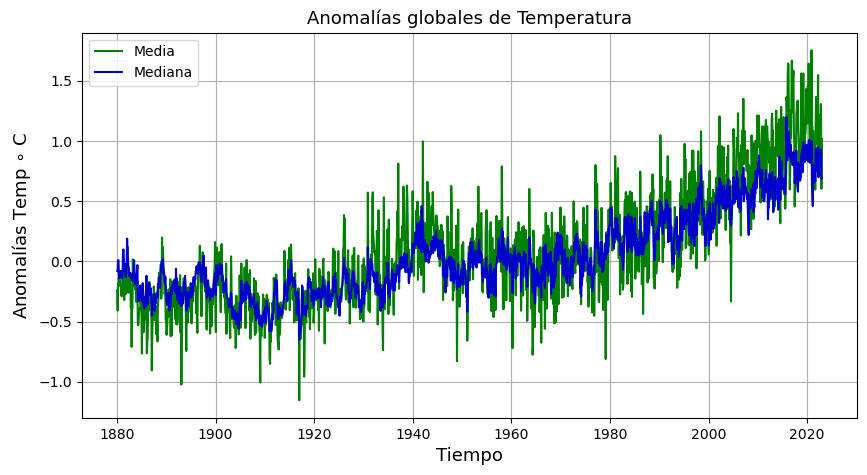

In [10]:
plt.figure(figsize=[10,5])
plt.plot(fechas, Mean, 'g', label = 'Media')
plt.plot(fechas, Median, color='mediumblue', label = 'Mediana')
#plt.plot(fechas,Mean + desv,'r',label=u'Desviación Estandar')
#plt.plot(fechas,Mean - desv,'r')
# plt.plot(fechas, perc_25, color='lightseagreen',lw=0.4)
# plt.plot(fechas, perc_75, color='lightseagreen',lw=0.4)
# plt.fill_between(fechas, Mean - desv,Mean + desv, alpha=0.2)
plt.legend(loc = 2)
plt.xlabel('Tiempo', fontsize=13)
plt.ylabel(u'Anomalías Temp $\circ$ C', fontsize=13)
plt.title(u'Anomalías globales de Temperatura', fontsize=13)
plt.grid()

# Graficación Medias zonas elegidas

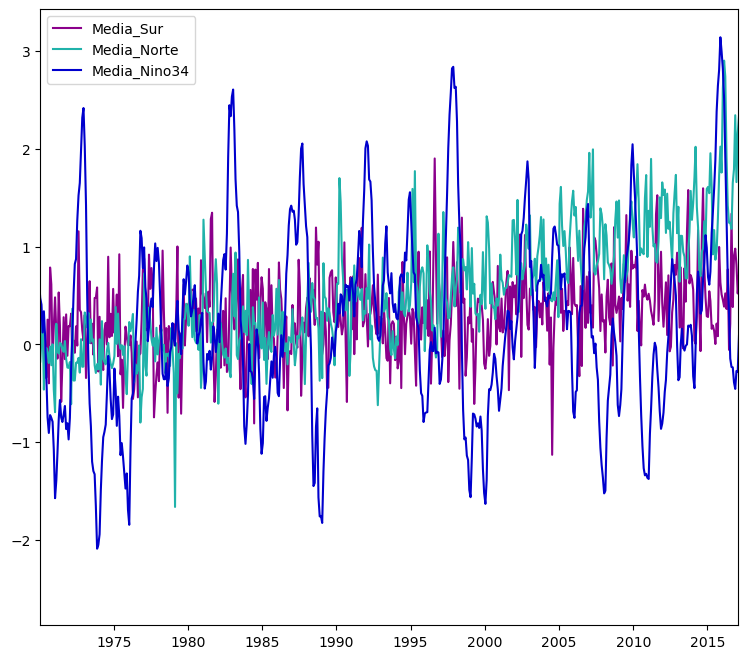

In [11]:
plt.figure(figsize=[9,8])
plt.plot(fechas,Media_Sur, color='darkmagenta', label = 'Media_Sur')
plt.plot(fechas,Media_Norte, color='lightseagreen', label = 'Media_Norte')
plt.plot(fechas,Media_Nino34, color='mediumblue', label = 'Media_Nino34')
plt.xlim([datetime.datetime(1970, 1, 15, 0, 0),datetime.datetime(2017, 1, 15, 0, 0)])
plt.legend()

# Graficación Medianas zonas elegidas

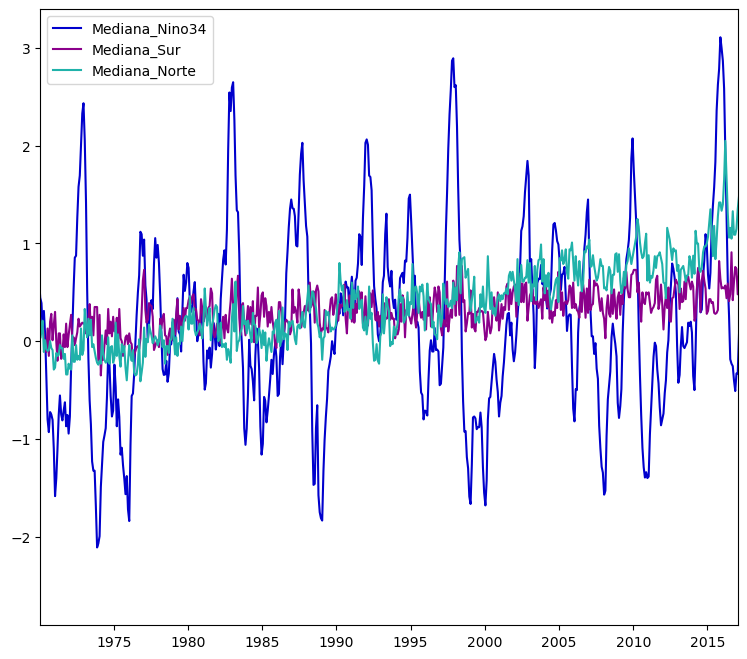

In [12]:
plt.figure(figsize=[9,8])
plt.plot(fechas,Mediana_Nino34, color='mediumblue', label = 'Mediana_Nino34')
plt.plot(fechas,Mediana_Sur, color='darkmagenta', label = 'Mediana_Sur')
plt.plot(fechas,Mediana_Norte, color='lightseagreen', label = 'Mediana_Norte')
plt.xlim([datetime.datetime(1970, 1, 15, 0, 0),datetime.datetime(2017, 1, 15, 0, 0)])
plt.legend()

In [13]:
Mediana_Nino34 == Media_Nino34

array([False, False, False, ..., False, False, False])

# Scatter plot (diagrama de dispersión) medias hemisferio sur vs hemisferio norte

Se grafican las medias espaciales de las series de datos del hemisferio sur vs el hemisferio norte.

In [14]:
# Agregar outlier a las series de medias
Media_Sur_outlier   = np.concatenate((Media_Sur  ,np.array([7] )))# le concatena un 7 como último dato a la serie Media_Sur
Media_Norte_outlier = np.concatenate((Media_Norte,np.array([-7])))# le concatena un -7 como último dato a la serie Media_Norte
#Calcular la correlación de pearson

In [15]:
print(Media_Sur_outlier)
print(Media_Sur_outlier.shape)

[ 0.07610566  0.09392745  0.09037507 ... -0.08380035  0.27830926
  7.        ]
(1717,)


In [16]:
print(Media_Sur)
print(Media_Sur.shape)

[ 0.07610566  0.09392745  0.09037507 ...  0.6988756  -0.08380035
  0.27830926]
(1716,)


PearsonRResult(statistic=0.5288349810788002, pvalue=2.9325145100953496e-124)


Text(2, -7, 'Corr = 0.372')

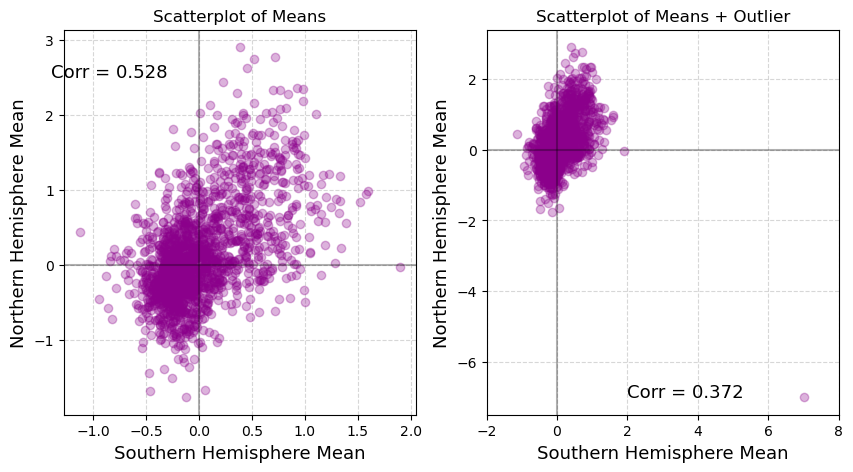

In [17]:
# Scatterplot without outliers

print(scp.pearsonr(Media_Sur, Media_Norte))

fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(121)
ax.set_title('Scatterplot of Means')
ax.plot(Media_Sur, Media_Norte, 'o', color='darkmagenta', alpha=0.3)
ax.set_xlabel('Southern Hemisphere Mean', fontsize=13)
ax.set_ylabel('Northern Hemisphere Mean', fontsize=13)
ax.axhline(0, color='k', alpha=0.3)
ax.axvline(0, color='k', alpha=0.3)
ax.text(-1.4, 2.5, 'Corr = ' + str(scp.pearsonr(Media_Sur, Media_Norte)[0])[:5], fontsize=13)
plt.grid(linestyle='--', alpha=0.5)

# Scatterplot with outliers

ax = fig.add_subplot(122)
ax.set_title('Scatterplot of Means + Outlier')
ax.plot(Media_Sur_outlier, Media_Norte_outlier, 'o', color='darkmagenta', alpha=0.3)
ax.set_xlabel('Southern Hemisphere Mean', fontsize=13)
ax.set_ylabel('Northern Hemisphere Mean', fontsize=13)
ax.axhline(0, color='k', alpha=0.3)
ax.axvline(0, color='k', alpha=0.3)
ax.set_xlim(-2, 8)
plt.grid(linestyle='--', alpha=0.5)
ax.text(2, -7, 'Corr = ' + str(round(scp.pearsonr(Media_Sur_outlier, Media_Norte_outlier)[0], 3)), fontsize=13)

# Suavizado de las series / Media Móvi

La media móvil es una técnica estadística utilizada para **suavizar una serie de datos**, calculando el valor promedio de un subconjunto de puntos dentro de la serie. Esto ayuda a **eliminar el ruido** o las fluctuaciones aleatorias en los datos y **resaltar las tendencias** o patrones subyacentes.

1716
1716


Text(0, 0.5, 'Media Hemisferio Norte')

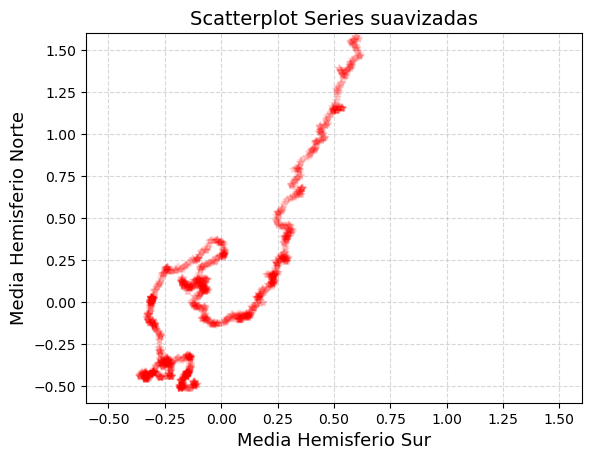

In [18]:
# Función para calcular la media móvil

def mediamovil(Serie1, Ventana):
    mov = np.zeros(len(Serie1)) * np.NaN
    for i in range(int(Ventana/2), int(len(Serie1) - Ventana/2), 1):
#   for i in range(24,1692,1):      
        mov[i]=np.nanmean(Serie1[int(i-Ventana/2):int(i+Ventana/2)])
    return mov

# Cálculo de la media móvil para una ventana de 8 años = 96 meses
MediaMovil_Sur   = mediamovil(Media_Sur, 96)
MediaMovil_Norte = mediamovil(Media_Norte, 96)
print (len(MediaMovil_Sur))
print (len(MediaMovil_Norte))
plt.plot(MediaMovil_Sur, MediaMovil_Norte, '*',color='r', alpha= 0.1)
plt.title('Scatterplot Series suavizadas', fontsize=14)
plt.xlabel('Media Hemisferio Sur', fontsize=13)
plt.xlim(-0.6,1.6)
plt.ylim(-0.6,1.6)
plt.grid(linestyle='--',alpha = 0.5)
plt.ylabel('Media Hemisferio Norte', fontsize=13)

In [19]:
print(MediaMovil_Sur[45:50])
print(fechas[45:50])# el primer dato de la media movil queda en 1884, 1, 15, 0, 0, dado que ventana/2 es 48

[        nan         nan         nan -0.10756209 -0.11036235]
[datetime.datetime(1883, 10, 15, 0, 0)
 datetime.datetime(1883, 11, 15, 0, 0)
 datetime.datetime(1883, 12, 15, 0, 0)
 datetime.datetime(1884, 1, 15, 0, 0) datetime.datetime(1884, 2, 15, 0, 0)]


In [20]:
print(MediaMovil_Sur.shape)
print(MediaMovil_Sur)
print(Media_Sur.shape)

(1716,)
[nan nan nan ... nan nan nan]
(1716,)


In [21]:
MediaMovil_Sur
MediaMovil_Norte

array([nan, nan, nan, ..., nan, nan, nan])

0.7733573644955419


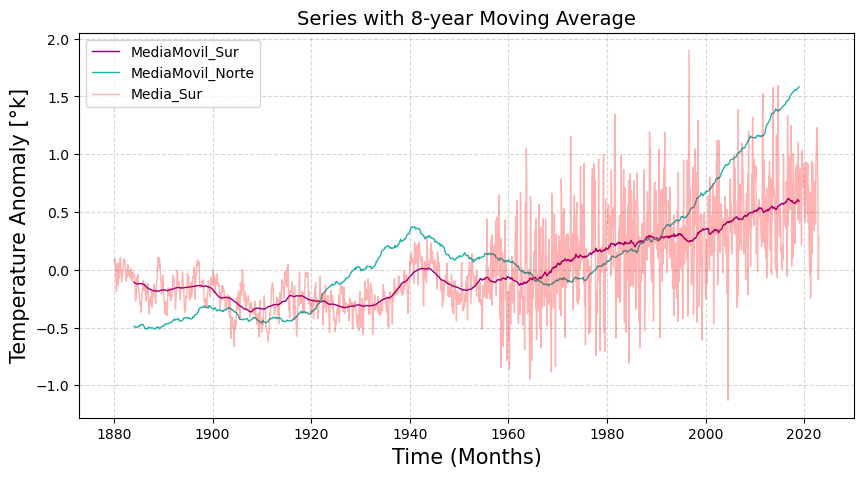

In [22]:
plt.figure(figsize=[10,5])
plt.plot(fechas,MediaMovil_Sur  , label = 'MediaMovil_Sur'  ,color = 'darkmagenta' , lw=1)
plt.plot(fechas,MediaMovil_Norte, label = 'MediaMovil_Norte',color = 'lightseagreen',lw=1)
plt.plot(fechas,Media_Sur,        label = 'Media_Sur'       ,color = 'r',          lw=1, alpha = 0.3)
plt.title('Series with 8-year Moving Average', fontsize=14)
plt.ylabel('Temperature Anomaly [°k]', fontsize=15)
plt.xlabel('Time (Months)', fontsize=15)
plt.legend(fontsize=10)
plt.grid(linestyle='--',alpha = 0.5)
print(scp.spearmanr(MediaMovil_Sur, MediaMovil_Norte, nan_policy = 'omit')[0])

# Resta la tendencia (Media móvil)

La resta de la media móvil a la serie de datos tiene como objetivo **extraer la componente de tendencia de la serie**, dejando únicamente las fluctuaciones alrededor de esa tendencia

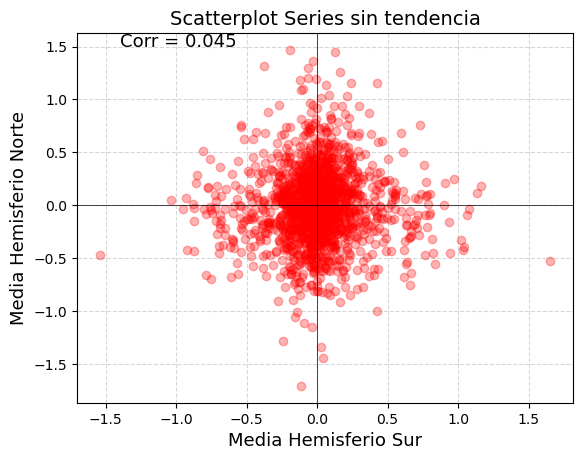

In [23]:
Resta_Sur   = Media_Sur   - MediaMovil_Sur
Resta_Norte = Media_Norte - MediaMovil_Norte

plt.plot(Resta_Sur, Resta_Norte, 'o', color = 'r', alpha = 0.3)
plt.title('Scatterplot Series sin tendencia', fontsize=14)
plt.xlabel('Media Hemisferio Sur', fontsize=13)
plt.ylabel('Media Hemisferio Norte', fontsize=13)
plt.text(-1.4, 1.5, u'Corr = '+str(scp.spearmanr(Resta_Sur, Resta_Norte,nan_policy = 'omit')[0])[:5],fontsize=13)
plt.axhline(0, color='k',lw=0.5)
plt.axvline(0, color='k',lw=0.5)
plt.grid(linestyle='--',alpha = 0.5)

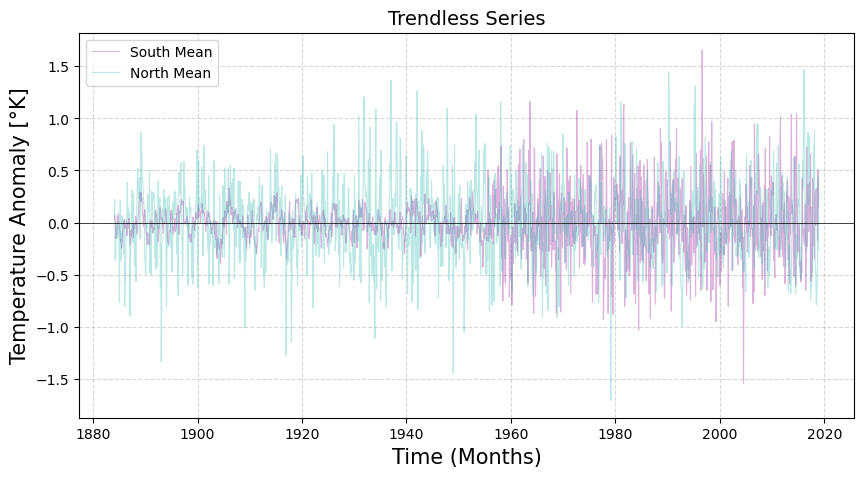

In [24]:
plt.figure(figsize=[10,5])
plt.plot(fechas, Resta_Sur, label='South Mean', color='darkmagenta', alpha=0.3, lw=0.8)
plt.plot(fechas, Resta_Norte, label='North Mean', color='lightseagreen', alpha=0.3, lw=0.8)
plt.title('Trendless Series', fontsize=14)
plt.ylabel('Temperature Anomaly [°K]', fontsize=15)
plt.xlabel('Time (Months)', fontsize=15)
plt.axhline(0, color='k', lw=0.5)
plt.legend()
plt.grid(linestyle='--', alpha=0.5)

In [24]:
#DECONSTRUCCION
# a = scp.pearsonr(Resta_Sur[i - (48/2): i + (48/2)],Resta_Norte[i - (48/2): i + (48/2)])[0]
a = scp.pearsonr(Resta_Sur[0:48],Resta_Norte[0:48])[0]
print (a)

-0.006453174213077936


* **Correlación positiva alta:** Una correlación móvil positiva alta entre las series del hemisferio norte y del hemisferio sur, después de haber removido la tendencia, podría indicar que los patrones de variabilidad de temperatura a corto plazo son similares en ambos hemisferios. Esto podría implicar una influencia global o eventos climáticos de gran escala que afectan a ambos hemisferios de manera similar.

* **Correlación positiva baja o fluctuante:** Si la correlación móvil positiva es baja o fluctúa a lo largo del tiempo, esto podría indicar que las variaciones de temperatura a corto plazo en los hemisferios norte y sur no están altamente correlacionadas. Podría sugerir influencias climáticas regionales más fuertes o la presencia de patrones de variabilidad local que difieren entre los hemisferios.

* **Correlación negativa:** Una correlación móvil negativa indicaría que las variaciones a corto plazo en las temperaturas del hemisferio norte y del hemisferio sur se comportan de manera opuesta. Esto podría estar asociado con patrones climáticos como el fenómeno El Niño/La Niña, donde los cambios en la temperatura en un hemisferio pueden estar relacionados inversamente con los del otro hemisferio.

# Mapa de Correlación toda la serie

In [26]:
Mapa_Correlacion = np.zeros([len(lat),len(lon)]) * np.NaN
for i in range(len(lat)):
    for j in range(len(lon)):
        Mapa_Correlacion[i,j] = scp.spearmanr(Media_Nino34, tempanomaly[:,i,j],nan_policy = 'omit')[0]

In [28]:
Mapa_Correlacion_rolled = np.roll(Mapa_Correlacion, int(len(lon)/2))# la division en python da un float por defecto, se debe garantizar un integer para la función np.roll
print(Mapa_Correlacion)
print(Mapa_Correlacion_rolled)

[[-0.02013674 -0.02013674 -0.02013674 ... -0.02013674 -0.02013674
  -0.02013674]
 [-0.02013674 -0.02013674 -0.02013674 ... -0.02013674 -0.02013674
  -0.02013674]
 [-0.02013674 -0.02013674 -0.02013674 ... -0.02013674 -0.02013674
  -0.02013674]
 ...
 [-0.06484091 -0.06484091 -0.06484091 ... -0.06484091 -0.06484091
  -0.06484091]
 [-0.06484091 -0.06484091 -0.06484091 ... -0.06484091 -0.06484091
  -0.06484091]
 [-0.06484091 -0.06484091 -0.06484091 ... -0.06484091 -0.06484091
  -0.06484091]]
[[-0.06484091 -0.06484091 -0.06484091 ... -0.02013674 -0.02013674
  -0.02013674]
 [-0.02013674 -0.02013674 -0.02013674 ... -0.02013674 -0.02013674
  -0.02013674]
 [-0.02013674 -0.02013674 -0.02013674 ... -0.02013674 -0.02013674
  -0.02013674]
 ...
 [-0.06484091 -0.06484091 -0.06484091 ... -0.06484091 -0.06484091
  -0.06484091]
 [-0.06484091 -0.06484091 -0.06484091 ... -0.06484091 -0.06484091
  -0.06484091]
 [-0.06484091 -0.06484091 -0.06484091 ... -0.06484091 -0.06484091
  -0.06484091]]


In [29]:
print(Mapa_Correlacion.shape)
print(Mapa_Correlacion)

(90, 180)
[[-0.02013674 -0.02013674 -0.02013674 ... -0.02013674 -0.02013674
  -0.02013674]
 [-0.02013674 -0.02013674 -0.02013674 ... -0.02013674 -0.02013674
  -0.02013674]
 [-0.02013674 -0.02013674 -0.02013674 ... -0.02013674 -0.02013674
  -0.02013674]
 ...
 [-0.06484091 -0.06484091 -0.06484091 ... -0.06484091 -0.06484091
  -0.06484091]
 [-0.06484091 -0.06484091 -0.06484091 ... -0.06484091 -0.06484091
  -0.06484091]
 [-0.06484091 -0.06484091 -0.06484091 ... -0.06484091 -0.06484091
  -0.06484091]]


In [30]:
print(len(lon)/2)
print(lon)

90.0
[-179. -177. -175. -173. -171. -169. -167. -165. -163. -161. -159. -157.
 -155. -153. -151. -149. -147. -145. -143. -141. -139. -137. -135. -133.
 -131. -129. -127. -125. -123. -121. -119. -117. -115. -113. -111. -109.
 -107. -105. -103. -101.  -99.  -97.  -95.  -93.  -91.  -89.  -87.  -85.
  -83.  -81.  -79.  -77.  -75.  -73.  -71.  -69.  -67.  -65.  -63.  -61.
  -59.  -57.  -55.  -53.  -51.  -49.  -47.  -45.  -43.  -41.  -39.  -37.
  -35.  -33.  -31.  -29.  -27.  -25.  -23.  -21.  -19.  -17.  -15.  -13.
  -11.   -9.   -7.   -5.   -3.   -1.    1.    3.    5.    7.    9.   11.
   13.   15.   17.   19.   21.   23.   25.   27.   29.   31.   33.   35.
   37.   39.   41.   43.   45.   47.   49.   51.   53.   55.   57.   59.
   61.   63.   65.   67.   69.   71.   73.   75.   77.   79.   81.   83.
   85.   87.   89.   91.   93.   95.   97.   99.  101.  103.  105.  107.
  109.  111.  113.  115.  117.  119.  121.  123.  125.  127.  129.  131.
  133.  135.  137.  139.  141.  143.  145.  14

In [31]:
print(np.nanmin(Mapa_Correlacion))
print(np.nanmax(Mapa_Correlacion))

-0.33941660358843107
0.991505427296149


#### Mapa de Correlación toda la serie usando Basemap

Text(0.5, 1.0, 'Correlation between STA in Niño 3-4 and planetary STA')

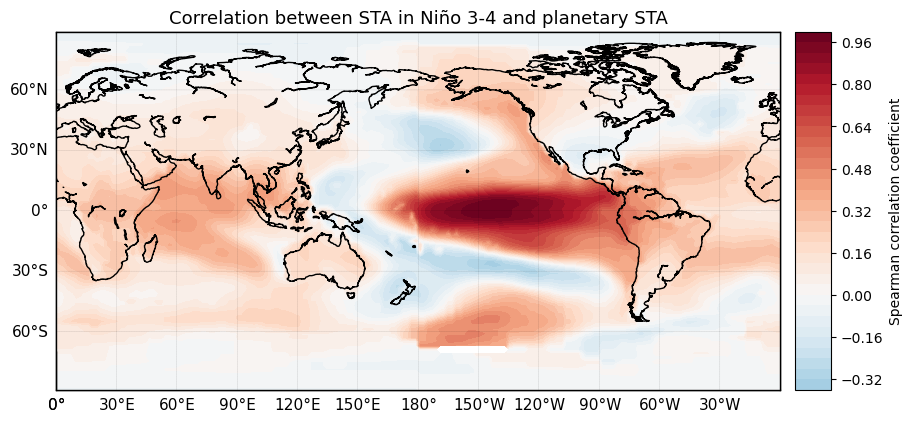

In [32]:
plt.close('all')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
vmin = -1
vmax = 1
m = Basemap(llcrnrlat=np.min(lat),urcrnrlat=np.max(lat),llcrnrlon=np.min(0),urcrnrlon=np.max(360),\
rsphere=6371200.,resolution='l',area_thresh=10000)

ny = lat.shape[0]; nx = lon.shape[0]
lons, lats = m.makegrid(nx, ny)
x,y = m(lons, lats)
#cs = m.contourf(x,y,np.flipud(Mapa))

cs = m.contourf(x,y,np.roll(Mapa_Correlacion, int(len(lon)/2)),cmap='RdBu_r',levels = 40)# roll pone de primero las 90 (len(lon)/2)) últimas posiciones de longitudes de los datos, esto centrs el mapa en el oceano Pacifico. esto se debe a que las longitudes estan de -179 a +179, y basemap grafica en longitudes de 0°a 360°. es una conversion longitudinal
# Aquí, np.roll() se aplica a la matriz Mapa_Correlacion y se desplaza la matriz en int(len(lon)/2) posiciones. 
# El desplazamiento circular asegura que las últimas int(len(lon)/2) posiciones de longitud de los datos se coloquen al 
# principio de la matriz, lo que centra el mapa en el océano Pacífico. Esto se debe a que las longitudes van de -179 a +179, 
# mientras que Basemap traza en longitudes de 0° a 360°.
# Crear la barra de colores con valores fijos

plt.clim(-1, 1)  # Establecer los límites de la barra de colores
m.colorbar(cs,label = 'Spearman correlation coefficient')
m.drawparallels(np.arange(-90.,90,30.), labels=[1,0,0,0], size=11,linewidth=0.1)
m.drawmeridians(np.arange(0, 360, 30.), labels=[0,1,0,1], size=11, linewidth=0.1)# por estas longitudes (meridianos) 0 a 360 es que se aplica roll a la matriz bidimensional Mapa_Correlacion
m.drawcoastlines()
m.drawmapboundary()
plt.title('Correlation between STA in Niño 3-4 and planetary STA', fontsize=13)


#### Mapa de Correlación toda la serie usando cartopy

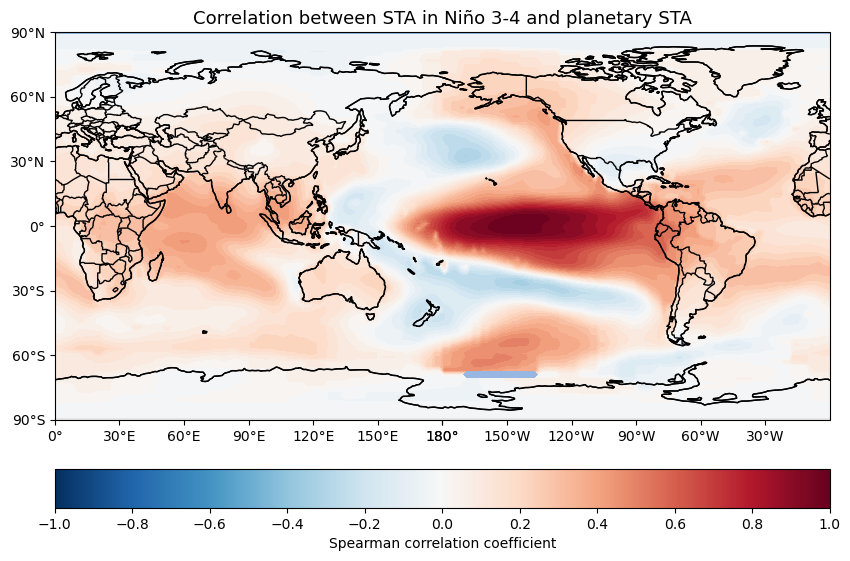

In [33]:
# Definir los límites geográficos para centrar el mapa en el océano Pacífico
lon_min = 0
lon_max = 360
lat_min = -90
lat_max = 90
vmin = -1
vmax = 1

# Definir el objeto de Cartopy
plt.close('all')
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=(lon_min + lon_max) / 2))

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor='0.9')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

Mapa_Correlacion_add, lonx = cutil.add_cyclic_point(Mapa_Correlacion, coord=lon)# Debe utilizar cartopy.util.add_cyclic_point para que contourf vea los datos como continuos en la dirección x y la línea blanca desaparezca:

# Crear el mapa de colores utilizando el método contourf
cs = ax.contourf(lonx, lat, Mapa_Correlacion_add, cmap='RdBu_r', transform=ccrs.PlateCarree(),levels=40, vmin=-1, vmax=1)

# Crear la barra de colores con valores fijos
sm = cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, location='bottom', pad=0.08, label='Spearman correlation coefficient')
cbar.set_ticks(np.linspace(vmin, vmax, 11))  # Establecer los ticks de la barra de colores

# Dibujar los paralelos y meridianos
ax.set_xticks(range(-180, 181, 30), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(cartopy.mpl.ticker.LongitudeFormatter())
ax.yaxis.set_major_formatter(cartopy.mpl.ticker.LatitudeFormatter())

# Agregar los límites de los mapas
ax.coastlines()

plt.title('Correlation between STA in Niño 3-4 and planetary STA', fontsize=13)
plt.show()

# Mapa correlación mes a mes

En este bloque de código, se correlaciona una serie espacial de Niño34 con el planeta para la misma variable, STA. Sin embargo, se realiza por mes, lo que significa que los valores de enero para Niño34 se correlacionan con los valores de enero para cada uno de los pixeles del planeta, los valores de febrero se correlacionan con los valores de febrero, y así sucesivamente hasta llegar a correlacionar diciembre para Niño34 con diciembre para cada uno de los pixeles del planeta.

In [34]:
#In this code block, a spatial series of Niño34 is correlated with the planet for the same variable, STA. However, it is done by month, meaning that January values are correlated with January values, February values with February values, and so on, up to December values correlated with December values.
Meses = np.array([fechas[i].month for i in range(len(fechas))])# se crea arreglo de los meses que corresponden a cada fecha en el arreglo fechas
Matriz_Meses_Corr = np.zeros([12,len(lat),len(lon)]) * np.NaN  # matriz de ceros para poner los doce mapas de los doce meses de correlación entre promedio espacial nino34 con el planeta

for k in range(1,13):
    tmp = np.where(Meses == k)[0]      # arreglo de posiciones del mes k en el arreglo Meses
    Temp_meses      = tempanomaly[tmp,:,:]  # mapa del planeta en los eneros (k=1) de la serie. tmp es un arreglo que se evalua dentro del arreglo de tempanomaly
    TempNino_meses = Media_Nino34[tmp] # serie de tiempo promedio espacial del area nino34 en los eneros (k=1) de la serie
    for i in range(len(lat)):
        for j in range(len(lon)):
            Matriz_Meses_Corr[k - 1,i,j] = scp.spearmanr(Temp_meses[:,i,j], TempNino_meses,nan_policy = 'omit')[0] # mapa de correlacion de los eneros (k=1), entre el planeta y la serie promedio espacial en la zona nino34 en los eneros (k=1)

In [35]:
Matriz_Meses_Corr.shape
# Matriz_Meses_Corr

(12, 90, 180)

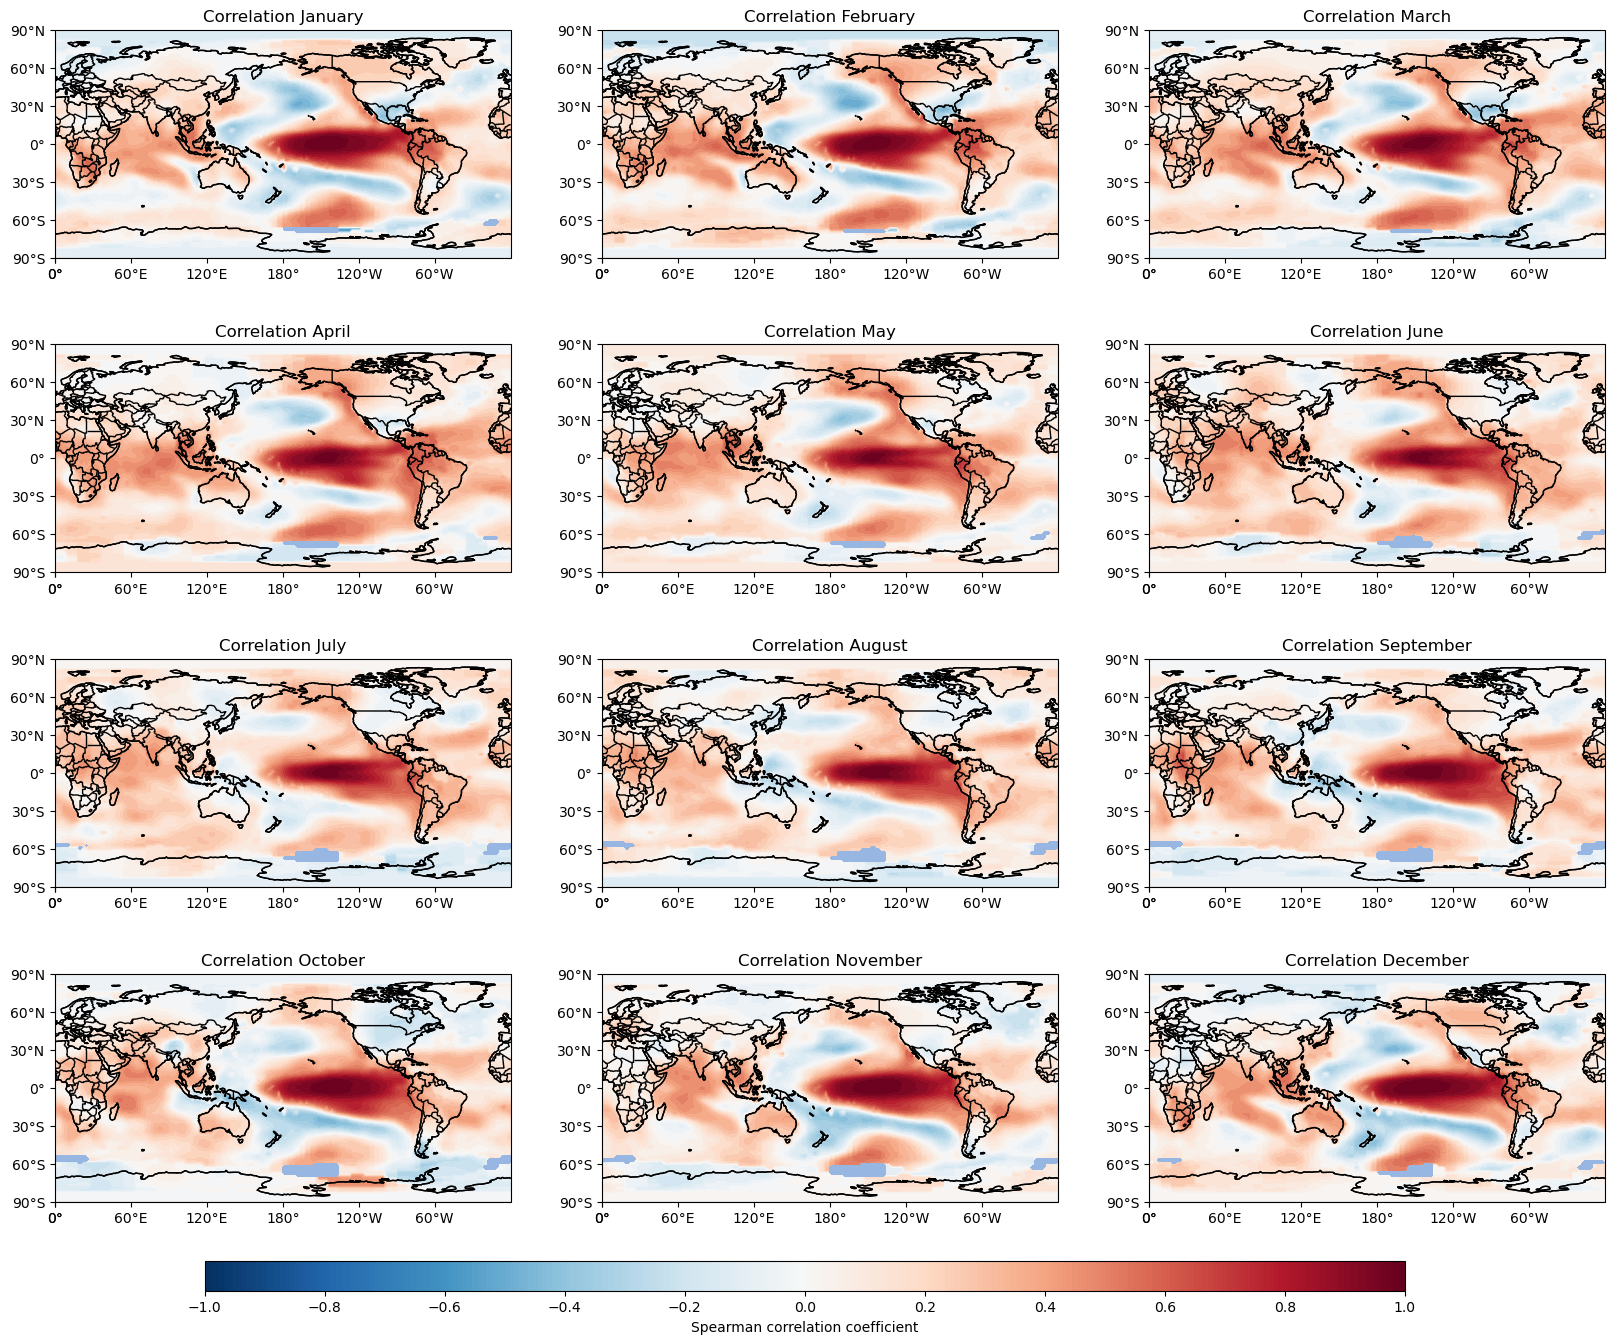

In [36]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

lon_min = 0
lon_max = 360
lat_min = -90
lat_max = 90

# Definir valores mínimos y máximos de la escala de colores
vmin = -1
vmax = 1
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, axs = plt.subplots(4, 3, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=(lon_min + lon_max) / 2)})

cbar_height = 0.02  # Altura de la barra de colores
cbar_gap    = 0.02  # Espacio entre la última fila de subfiguras y la barra de colores

plt.subplots_adjust(hspace=0.1)  # Ajustar el espacio vertical entre las filas de subfiguras

for i, month in enumerate(months):
    ax = axs[i // 3, i % 3]#El rango del residuo siempre será desde 0 hasta el valor del divisor menos 1, en este caso de 0,1,2.
#    se utiliza para asignar la subfigura (ax) correspondiente en la matriz de subfiguras (axs), basándose en el índice actual de iteración i.
#    i // 3 calcula el índice de fila en la matriz de subfiguras. Como se tienen 4 filas en total, esto generará un valor entre 0 y 3
#    i % 3 calcula el índice de columna en la matriz de subfiguras. Como se tienen 3 columnas en total, esto generará un valor entre 0 y 2
    ax.set_title('Correlation {}'.format(month))
    
    ax.add_feature(cfeature.LAND, facecolor='0.9')
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    Matriz_Meses_Corr_add, lonx = cutil.add_cyclic_point(Matriz_Meses_Corr[i,:,:], coord=lon)
    
    # Crear el mapa de colores utilizando contourf
    cs = ax.contourf(lonx, lat, Matriz_Meses_Corr_add, cmap='RdBu_r', transform=ccrs.PlateCarree(), levels=40, vmin=vmin, vmax=vmax)
    
    # Dibujar los paralelos y meridianos
    ax.set_xticks(range(0, 361, 60), crs=ccrs.PlateCarree())
    ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(cartopy.mpl.ticker.LongitudeFormatter())
    ax.yaxis.set_major_formatter(cartopy.mpl.ticker.LatitudeFormatter())
    
    # Agregar los límites de los mapas
    ax.coastlines()

# Posición y tamaño de la barra de colores
cbar_position = [0.2, 0.02, 0.6, cbar_height]

# Ajustar la posición de la última fila de subfiguras para dejar espacio para la barra de colores
fig.subplots_adjust(bottom=cbar_position[1] + cbar_position[3] + cbar_gap)

# Crear la barra de colores con valores fijos para toda la figura
sm = cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = fig.colorbar(sm, orientation='horizontal', cax=fig.add_axes(cbar_position), label='Spearman correlation coefficient')
cbar.set_ticks(np.linspace(vmin, vmax, 11))  # Establecer los ticks de la barra de colores
plt.savefig('corr_mesames.png',dpi=300)
plt.show()


In [37]:
for i in range(12):# itera las columnas de la matriz axs de subfiguras
    print(i%3)

0
1
2
0
1
2
0
1
2
0
1
2


In [38]:
for i in range(12):# itera las filas del la matriz axs de subfiguras
    print(i//3)

0
0
0
1
1
1
2
2
2
3
3
3


# Memoria de las correlaciones con Niño 3-4 para STA

* La memoria de las correlaciones se refiere a la **persistencia o relación a largo plazo** entre las anomalías de temperatura en la región de Niño 3.4 y las anomalías de temperatura en otras ubicaciones del planeta a medida que se desplaza en el tiempo.

* Cuando calculas las correlaciones rezagadas mes a mes entre la serie de tiempo de anomalías de temperatura en la zona Niño 3.4 y las anomalías de temperatura en el resto del planeta, estás evaluando **cómo las anomalías de temperatura en Niño 3.4 en un mes determinado se relacionan con las anomalías de temperatura en diferentes ubicaciones** del planeta en meses posteriores.

* La memoria de las correlaciones se refiere a **cuánto tiempo persisten esas relaciones** o correlaciones significativas entre las anomalías de temperatura en la zona Niño 3.4 y las anomalías de temperatura en otras áreas del planeta. 

* Si encuentras que las correlaciones son altas y significativas incluso con un retraso de varios meses, eso indica que existe una **memoria de largo plazo en las correlaciones entre Niño 3.4 y otras regiones**. Por lo tanto, hay una relación entre las anomalías de temperatura en Niño 3.4 en un mes determinado y las anomalías de temperatura en otras áreas del planeta en meses posteriores.

# Mapas correlación con rezago

* Se calculan todas las correlaciones entre enero para Nino34 con los eneros del planeta, luego con los febreros del planeta, marzo.... Es decir, se deja un mes fijo para Nino34 y se rezagan los meses para el planeta. Luego, nuevamente se calculan las correlaciones, pero esta vez dejando fijo a febrero para Nino34 y correlacionándolo con los febreros del planeta, los marzos, .....y así sucesivamente.

* Lo que se busca con esto es estimar las memorias de las correlaciones entre la STA de Niño34 con la STA del planeta en la escala mensual

In [39]:
Corr_R = np.zeros([12,13,len(lat),len(lon)]) * np.NaN
# [Meses, Rezagos, lat,lon]
Meses = np.array([fechas[i].month for i in range(len(fechas))])

for Mes in range(1,13):
    tmp = np.where(Meses == Mes)[0] # arreglo que dice las posiciones de enero(feb,mar,abr etc...) en el arreglo Meses
    tmp = tmp[:-1]# no toma el último mes del arreglo tmp, para ningun Mes
    Temp_Mes = Media_Nino34[tmp] # los eneros en la serie de tiempo de nino34
    for Rezago in range(0,13):
        Temp_Rezago = tempanomaly[tmp + Rezago,:,:] # los datos del planeta se van rezagando de 0 a 12 por cada iteración del ciclo for Rezago, cuando se terminen las 13 iteraciones (de 0 a 12) la zona nino34 cambia a febreros y nuevamente se correlacionan con los 13 rezagos  en el ciclo for Rezago, 
                                                    # asi sucesivamente se va obteniendo una matriz cuatridimensional [Meses, Rezagos, lat,lon], donde por cada mes de la serie nino34 hay 13 rezagos de correlación para los pixeles del planeta.
        for i in range(len(lat)):
            for j in range(len(lon)):
                Corr_R[Mes - 1,Rezago,i,j] = scp.spearmanr(Temp_Rezago[:,i,j], Temp_Mes)[0]# se va llenando la matriz cuatridimensional Corr_R, de manera que por cada iteración del for Rezago se llenan todos los pixeles i,j del mapa, generando asi un mapa de correlacion entre la serie de tiempo nino34 en enero con los eneros, febreros .....diciembres, eneros de cada uno de los pixeles del mapa, de manera independiente
                                                                                           # se puede ver Temp_Mes como la serie pivote de eneros con la cual se correlacionan los eneros, febreros .... de los pixeles de los datos

In [40]:
print(Meses)
print(Meses.shape)
print(Temp_Mes.shape)

[ 1  2  3 ... 10 11 12]
(1716,)
(142,)


## DECONSTRUCCIÓN REZAGOS

¿Que sucede si no se pone tmp = tmp[:-1]?

In [39]:
fechas

array([datetime.datetime(1880, 1, 15, 0, 0),
       datetime.datetime(1880, 2, 15, 0, 0),
       datetime.datetime(1880, 3, 15, 0, 0), ...,
       datetime.datetime(2022, 10, 15, 0, 0),
       datetime.datetime(2022, 11, 15, 0, 0),
       datetime.datetime(2022, 12, 15, 0, 0)], dtype=object)

In [40]:
#DECONSTRUCCIÓN 
Corr_R = np.zeros([12,13,len(lat),len(lon)]) * np.NaN
# [Meses, Rezagos, lat,lon]
Meses = np.array([fechas[i].month for i in range(len(fechas))])

for Mes in range(1,13):
    tmp = np.where(Meses == Mes)[0]
    print('Tomando enero en el ultimo año',tmp)
    tmp = tmp[:-1]
    print('Sin tomar enero del ultimo año',tmp)
    print('Rezagando un mes del arreglo que no toma enero del ultimo año',tmp + 1)
    break
    Temp_Mes = Media_Nino34[tmp]
    for Rezago in range(0,13):
        Temp_Rezago = tempanomaly[tmp + Rezago,:,:]
        for i in range(len(lat)):
            for j in range(len(lon)):
                Corr_R[Mes - 1,Rezago,i,j] = scp.spearmanr(Temp_Rezago[:,i,j], Temp_Mes)[0]

Tomando enero en el ultimo año [   0   12   24   36   48   60   72   84   96  108  120  132  144  156
  168  180  192  204  216  228  240  252  264  276  288  300  312  324
  336  348  360  372  384  396  408  420  432  444  456  468  480  492
  504  516  528  540  552  564  576  588  600  612  624  636  648  660
  672  684  696  708  720  732  744  756  768  780  792  804  816  828
  840  852  864  876  888  900  912  924  936  948  960  972  984  996
 1008 1020 1032 1044 1056 1068 1080 1092 1104 1116 1128 1140 1152 1164
 1176 1188 1200 1212 1224 1236 1248 1260 1272 1284 1296 1308 1320 1332
 1344 1356 1368 1380 1392 1404 1416 1428 1440 1452 1464 1476 1488 1500
 1512 1524 1536 1548 1560 1572 1584 1596 1608 1620 1632 1644 1656 1668
 1680 1692 1704]
Sin tomar enero del ultimo año [   0   12   24   36   48   60   72   84   96  108  120  132  144  156
  168  180  192  204  216  228  240  252  264  276  288  300  312  324
  336  348  360  372  384  396  408  420  432  444  456  468  480  49

In [41]:
tmp = np.where(Meses == 1)[0]
print(Rezago)
print(tmp + Rezago)
Temp_Rezago = tempanomaly[tmp + Rezago,:,:]# da error porque toma enero del ultimo año y lo rezaga

12
[  12   24   36   48   60   72   84   96  108  120  132  144  156  168
  180  192  204  216  228  240  252  264  276  288  300  312  324  336
  348  360  372  384  396  408  420  432  444  456  468  480  492  504
  516  528  540  552  564  576  588  600  612  624  636  648  660  672
  684  696  708  720  732  744  756  768  780  792  804  816  828  840
  852  864  876  888  900  912  924  936  948  960  972  984  996 1008
 1020 1032 1044 1056 1068 1080 1092 1104 1116 1128 1140 1152 1164 1176
 1188 1200 1212 1224 1236 1248 1260 1272 1284 1296 1308 1320 1332 1344
 1356 1368 1380 1392 1404 1416 1428 1440 1452 1464 1476 1488 1500 1512
 1524 1536 1548 1560 1572 1584 1596 1608 1620 1632 1644 1656 1668 1680
 1692 1704 1716]


IndexError: index 1716 is out of bounds for axis 0 with size 1716

In [42]:
Rezago

12

In [43]:
tmp = np.where(Meses == 12)[0]
tmp # las posiciones de los diciembres en la serie Meses

array([  11,   23,   35,   47,   59,   71,   83,   95,  107,  119,  131,
        143,  155,  167,  179,  191,  203,  215,  227,  239,  251,  263,
        275,  287,  299,  311,  323,  335,  347,  359,  371,  383,  395,
        407,  419,  431,  443,  455,  467,  479,  491,  503,  515,  527,
        539,  551,  563,  575,  587,  599,  611,  623,  635,  647,  659,
        671,  683,  695,  707,  719,  731,  743,  755,  767,  779,  791,
        803,  815,  827,  839,  851,  863,  875,  887,  899,  911,  923,
        935,  947,  959,  971,  983,  995, 1007, 1019, 1031, 1043, 1055,
       1067, 1079, 1091, 1103, 1115, 1127, 1139, 1151, 1163, 1175, 1187,
       1199, 1211, 1223, 1235, 1247, 1259, 1271, 1283, 1295, 1307, 1319,
       1331, 1343, 1355, 1367, 1379, 1391, 1403, 1415, 1427, 1439, 1451,
       1463, 1475, 1487, 1499, 1511, 1523, 1535, 1547, 1559, 1571, 1583,
       1595, 1607, 1619, 1631, 1643, 1655, 1667, 1679, 1691, 1703, 1715],
      dtype=int64)

In [44]:
tmpRezagado = tmp + Rezago # las posiciones de los diciembres rezagadas 12 meses
print (tmpRezagado) # es ahí donde la última posición del arreglo de meses tmpRezagado queda fuera de las posiciones que toma el arreglo  tempanomaly[tmp + Rezago,:,:] en la dimension temporal y sale el error 'IndexError: index 1716 is out of bounds for axis 0 with size 1716'

[  23   35   47   59   71   83   95  107  119  131  143  155  167  179
  191  203  215  227  239  251  263  275  287  299  311  323  335  347
  359  371  383  395  407  419  431  443  455  467  479  491  503  515
  527  539  551  563  575  587  599  611  623  635  647  659  671  683
  695  707  719  731  743  755  767  779  791  803  815  827  839  851
  863  875  887  899  911  923  935  947  959  971  983  995 1007 1019
 1031 1043 1055 1067 1079 1091 1103 1115 1127 1139 1151 1163 1175 1187
 1199 1211 1223 1235 1247 1259 1271 1283 1295 1307 1319 1331 1343 1355
 1367 1379 1391 1403 1415 1427 1439 1451 1463 1475 1487 1499 1511 1523
 1535 1547 1559 1571 1583 1595 1607 1619 1631 1643 1655 1667 1679 1691
 1703 1715 1727]


In [45]:
tempanomaly.shape

(1716, 90, 180)

In [48]:
tempanomaly[1716,:,:]

IndexError: index 1716 is out of bounds for axis 0 with size 1716

In [49]:
Corr_R.shape

(12, 13, 90, 180)

## Mapas correlación con rezago para marzo

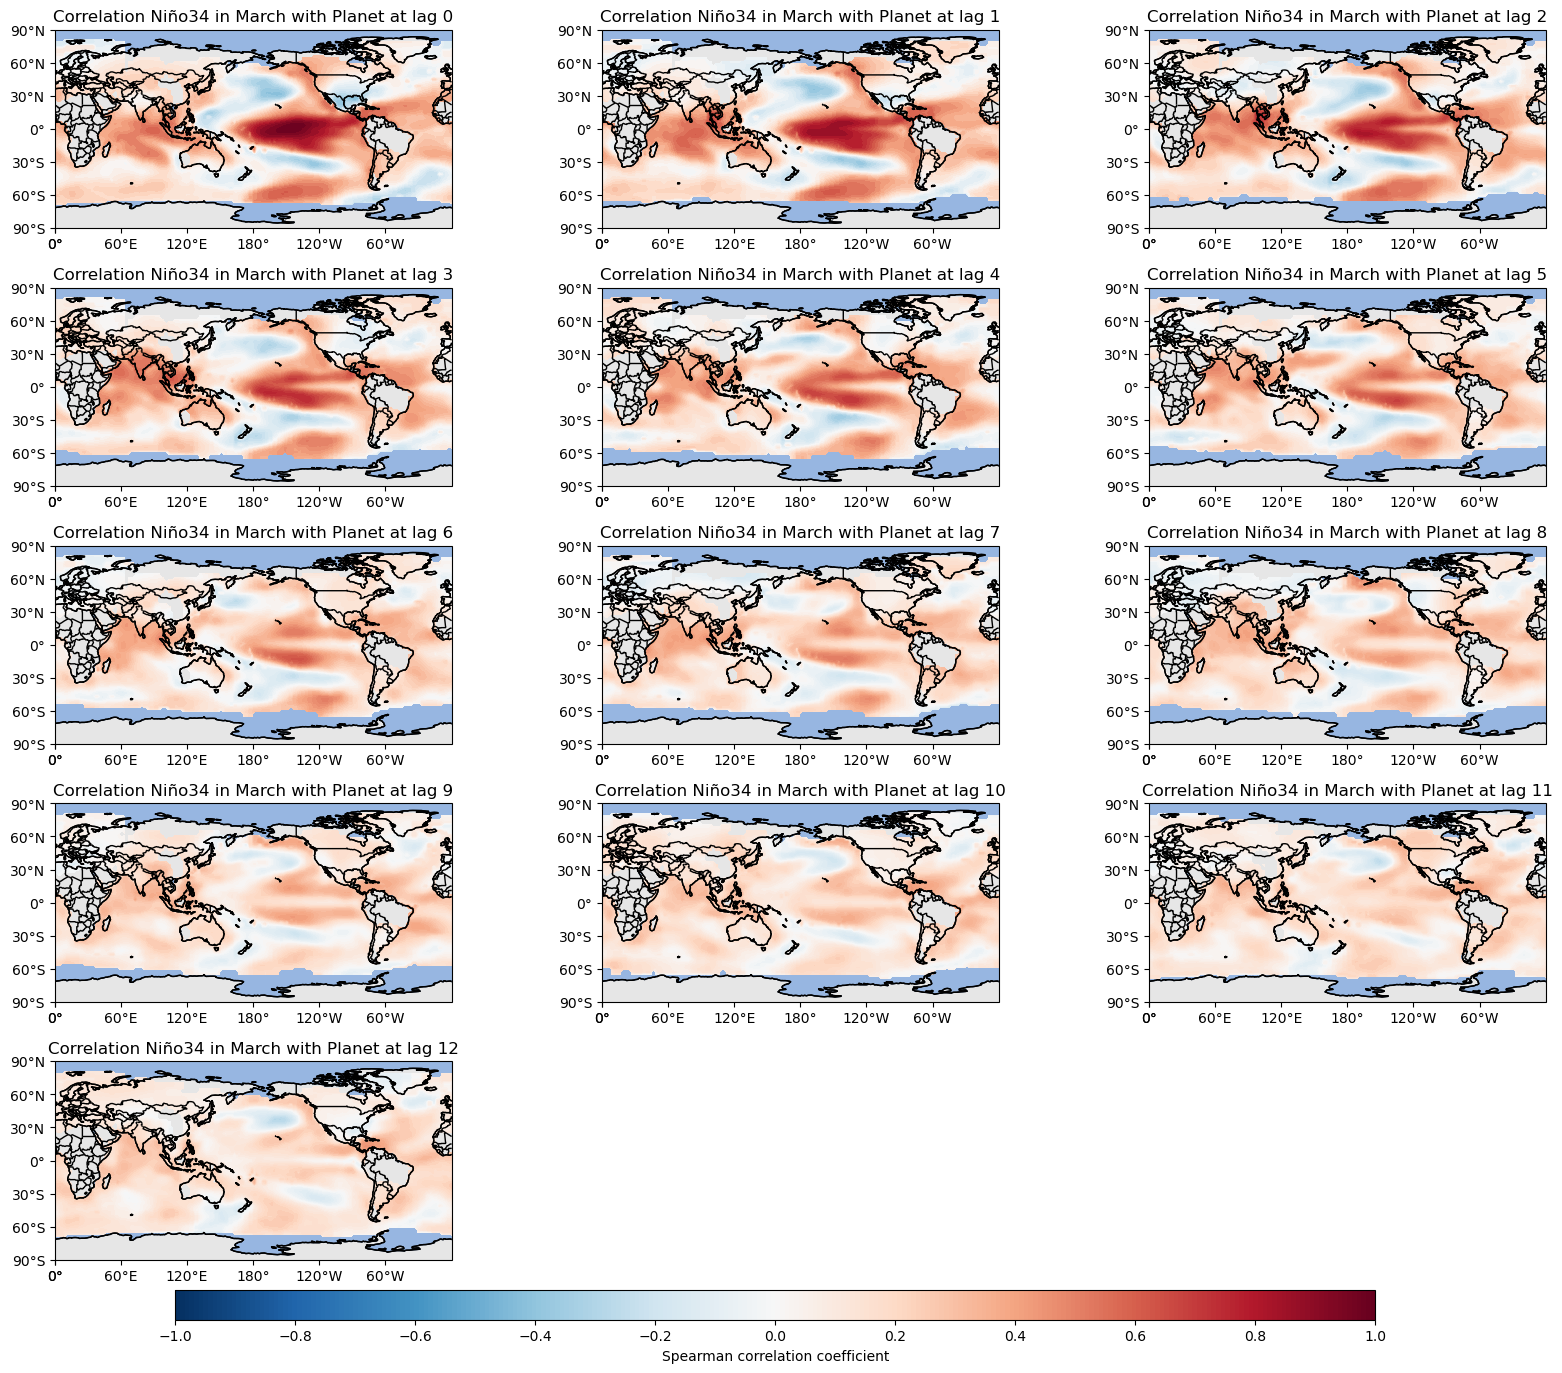

In [50]:
lon_min = 0
lon_max = 360
lat_min = -90
lat_max = 90

Mes_Ref = 'March'
Mes_Ref_index = 2

# Definir valores mínimos y máximos de la escala de colores
vmin = -1
vmax = 1

fig, axs = plt.subplots(5, 3, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=(lon_min + lon_max) / 2)})

cbar_height = 0.02  # Altura de la barra de colores
cbar_gap    = 0.02  # Espacio entre la última fila de subfiguras y la barra de colores

plt.subplots_adjust(hspace=0.3)  # Ajustar el espacio vertical entre las filas de subfiguras

for Rezago in range(13):
    ax = axs[Rezago // 3, Rezago % 3]#El rango del residuo siempre será desde 0 hasta el valor del divisor menos 1, en este caso de 0,1,2.
#    se utiliza para asignar la subfigura (ax) correspondiente en la matriz de subfiguras (axs), basándose en el índice actual de iteración i.
#    i // 3 calcula el índice de fila en la matriz de subfiguras. Como se tienen 4 filas en total, esto generará un valor entre 0 y 3
#    i % 3 calcula el índice de columna en la matriz de subfiguras. Como se tienen 3 columnas en total, esto generará un valor entre 0 y 2
    ax.set_title('Correlation Niño34 in {} with Planet at lag {}'.format(Mes_Ref,Rezago))
    
    ax.add_feature(cfeature.LAND, facecolor='0.9')
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    Matriz_Meses_Corr_add, lonx = cutil.add_cyclic_point(Corr_R[Mes_Ref_index,Rezago,:,:], coord=lon)
    
    # Crear el mapa de colores utilizando contourf
    cs = ax.contourf(lonx, lat, Matriz_Meses_Corr_add, cmap='RdBu_r', transform=ccrs.PlateCarree(), levels=40, vmin=vmin, vmax=vmax)
    
    # Dibujar los paralelos y meridianos
    ax.set_xticks(range(0, 361, 60), crs=ccrs.PlateCarree())
    ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(cartopy.mpl.ticker.LongitudeFormatter())
    ax.yaxis.set_major_formatter(cartopy.mpl.ticker.LatitudeFormatter())
    
    # Agregar los límites de los mapas
    ax.coastlines()
    
# Eliminación de los últimos subplots vacíos
fig.delaxes(axs[4, 1])
fig.delaxes(axs[4, 2])

# Posición y tamaño de la barra de colores
cbar_position = [0.2, 0.02, 0.6, cbar_height]

# Ajustar la posición de la última fila de subfiguras para dejar espacio para la barra de colores
fig.subplots_adjust(bottom=cbar_position[1] + cbar_position[3] + cbar_gap)

# Crear la barra de colores con valores fijos para toda la figura
sm = cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = fig.colorbar(sm, orientation='horizontal', cax=fig.add_axes(cbar_position), label='Spearman correlation coefficient')
cbar.set_ticks(np.linspace(vmin, vmax, 11))  # Establecer los ticks de la barra de colores
plt.savefig('corr_rezagada.png',dpi=300)
plt.show()

## Mapas correlación con rezago para diciembre

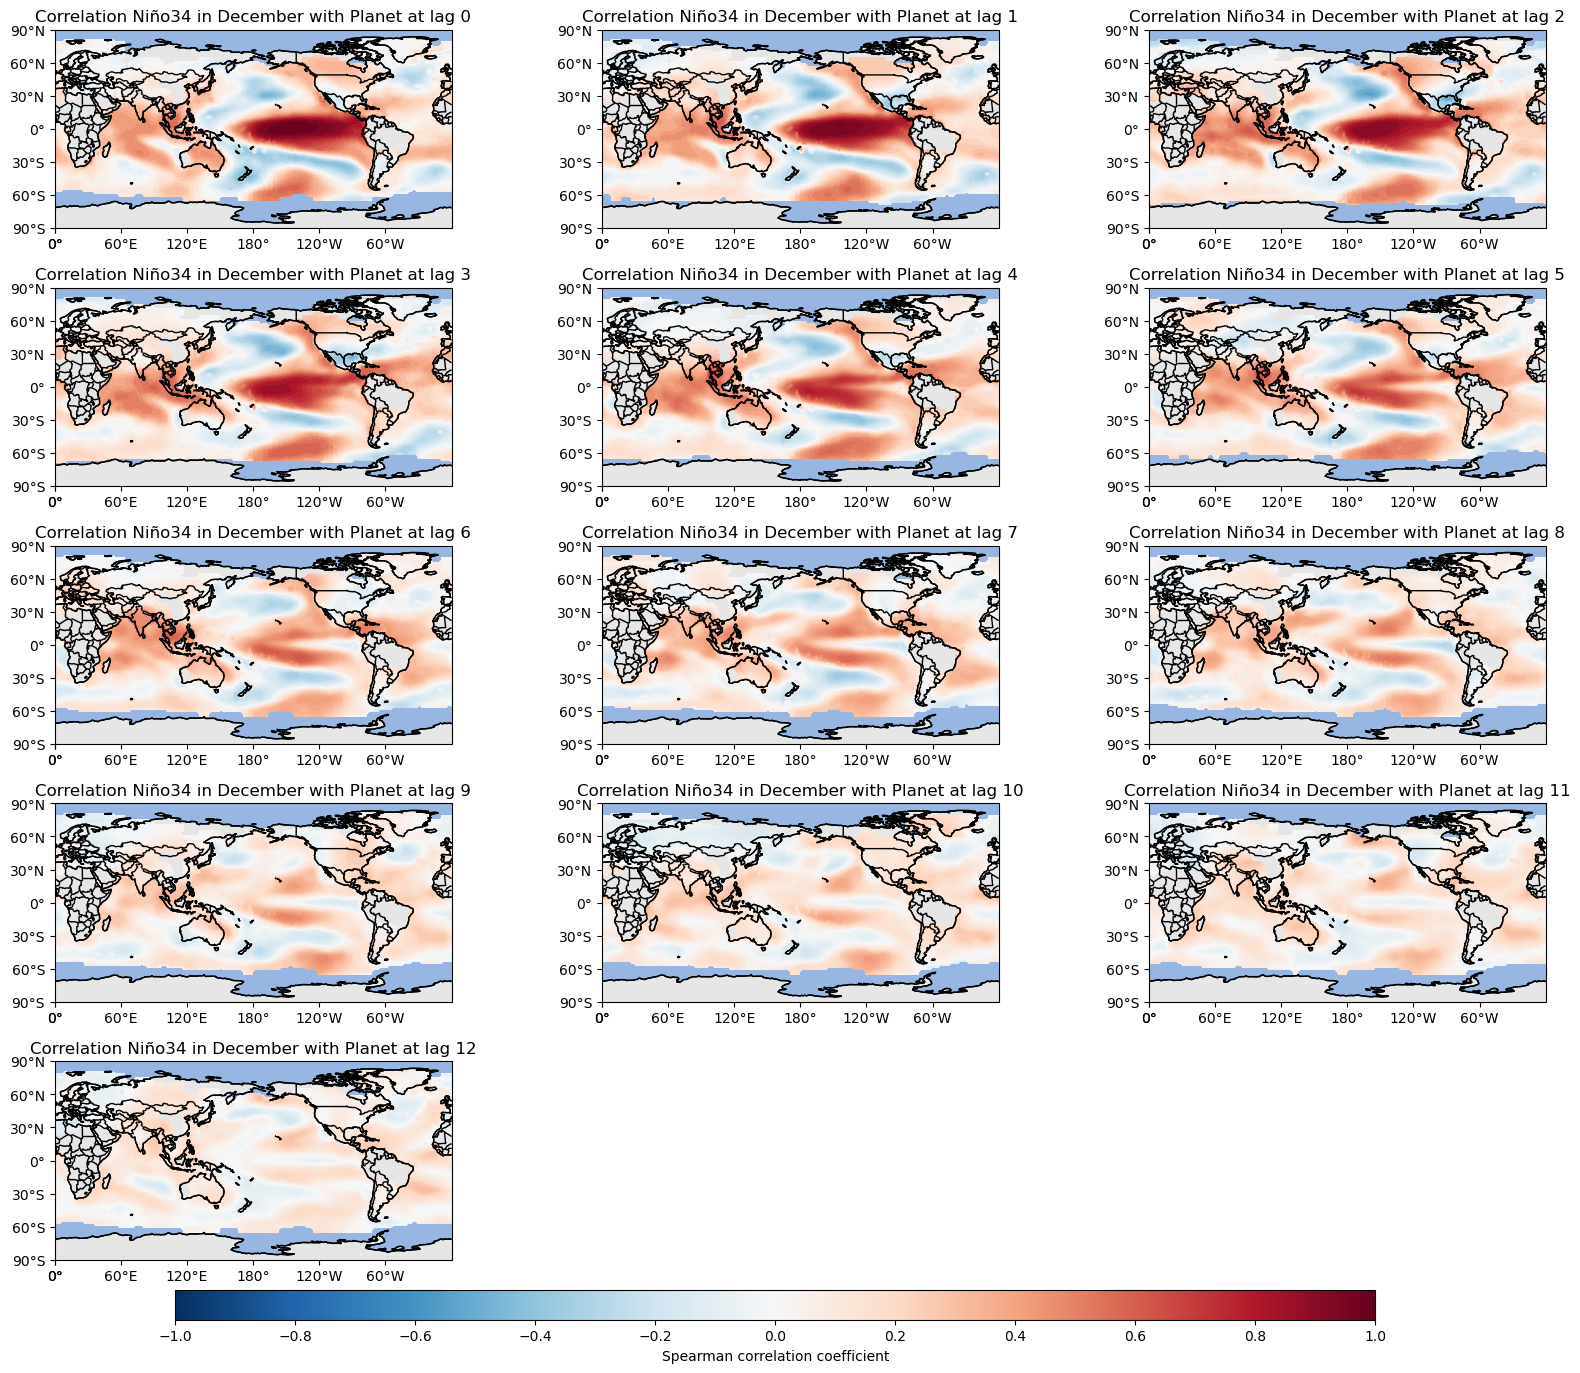

In [51]:
lon_min = 0
lon_max = 360
lat_min = -90
lat_max = 90

Mes_Ref = 'December'
Mes_Ref_index = 11

# Definir valores mínimos y máximos de la escala de colores
vmin = -1
vmax = 1

fig, axs = plt.subplots(5, 3, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=(lon_min + lon_max) / 2)})

cbar_height = 0.02  # Altura de la barra de colores
cbar_gap    = 0.02  # Espacio entre la última fila de subfiguras y la barra de colores

plt.subplots_adjust(hspace=0.3)  # Ajustar el espacio vertical entre las filas de subfiguras

for Rezago in range(13):
    ax = axs[Rezago // 3, Rezago % 3]#El rango del residuo siempre será desde 0 hasta el valor del divisor menos 1, en este caso de 0,1,2.
#    se utiliza para asignar la subfigura (ax) correspondiente en la matriz de subfiguras (axs), basándose en el índice actual de iteración i.
#    i // 3 calcula el índice de fila en la matriz de subfiguras. Como se tienen 4 filas en total, esto generará un valor entre 0 y 3
#    i % 3 calcula el índice de columna en la matriz de subfiguras. Como se tienen 3 columnas en total, esto generará un valor entre 0 y 2
    ax.set_title('Correlation Niño34 in {} with Planet at lag {}'.format(Mes_Ref,Rezago))
    
    ax.add_feature(cfeature.LAND, facecolor='0.9')
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    Matriz_Meses_Corr_add, lonx = cutil.add_cyclic_point(Corr_R[Mes_Ref_index,Rezago,:,:], coord=lon)
    
    # Crear el mapa de colores utilizando contourf
    cs = ax.contourf(lonx, lat, Matriz_Meses_Corr_add, cmap='RdBu_r', transform=ccrs.PlateCarree(), levels=40, vmin=vmin, vmax=vmax)
    
    # Dibujar los paralelos y meridianos
    ax.set_xticks(range(0, 361, 60), crs=ccrs.PlateCarree())
    ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(cartopy.mpl.ticker.LongitudeFormatter())
    ax.yaxis.set_major_formatter(cartopy.mpl.ticker.LatitudeFormatter())
    
    # Agregar los límites de los mapas
    ax.coastlines()

# Eliminación de los últimos subplots vacíos
fig.delaxes(axs[4, 1])
fig.delaxes(axs[4, 2])

# Posición y tamaño de la barra de colores
cbar_position = [0.2, 0.02, 0.6, cbar_height]

# Ajustar la posición de la última fila de subfiguras para dejar espacio para la barra de colores
fig.subplots_adjust(bottom=cbar_position[1] + cbar_position[3] + cbar_gap)

# Crear la barra de colores con valores fijos para toda la figura
sm = cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = fig.colorbar(sm, orientation='horizontal', cax=fig.add_axes(cbar_position), label='Spearman correlation coefficient')
cbar.set_ticks(np.linspace(vmin, vmax, 11))  # Establecer los ticks de la barra de colores
plt.savefig('corr_rezagada_december.png',dpi=300)
plt.show()

# Matriz de correlaciones rezagadas Niño34 - Oceano Pacifico
* La matriz de **Corr_R_Promedios** contiene el promedio espacial de las correlaciones rezagadas del Océano Pacifico con la serie Niño34. 
* **Corr_R_Promedios** tiene una shape de [12,13] Donde 12 representa los doce meses del año en Niño34 y 13 son los rezagos de las correlaciones promedio espacial para el Océano Pacifico
* Al aplicar np.nanmean se promedia espacialmente los valores de Corr_R en las dimensiones de latitud y longitud, que están representadas por los ejes (2, 3). Esto resulta en la matriz Corr_R_Promedios, donde cada valor representa el promedio espacial de las correlaciones en el área del Pacífico para cada mes y rezago.


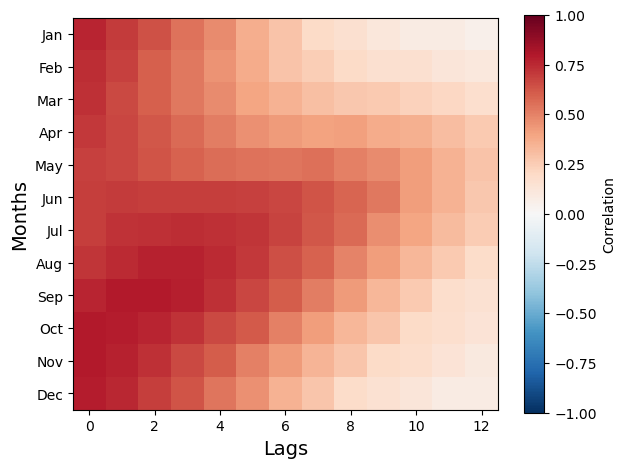

In [52]:
Pacifico_Lat = np.where((lat > -15) & (lat < 15))[0]
Pacifico_Lon = np.where((lon > -180) & (lon < -90))[0]

Corr_R_Promedios = np.nanmean(Corr_R[:, :, Pacifico_Lat,:][:, :, :, Pacifico_Lon], axis=(2, 3))
# Corr_R_Promedios = np.nanmean(Corr_R[meses, rezagos,Pacifico_Lat,lon][meses, rezagos,Pacifico_Lat,Pacifico_Lon], axis=(2, 3))
# Corr_R_Promedios = 
plt.imshow(Corr_R_Promedios, interpolation='nearest', cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xlabel('Lags', fontsize=14)
plt.ylabel('Months', fontsize=14)
plt.yticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [53]:
Corr_R.shape # matriz 4D original
# (12, 13, 90, 180) >>>> 12 cubos cada uno con 13 rezagos, 90 lats, 180 lons

(12, 13, 90, 180)

In [54]:
Corr_R[:10, :10, :10,:10].shape # se pueden seleccionar slices en 4D
# Corr_R[cubos del 0 al 9, rezagos del 0 al 9, lats de la 0 a la 9 posiciones, lons de la 0 a la 9 posiciones].shape

(10, 10, 10, 10)

In [55]:
Corr_R[:, :, Pacifico_Lat].shape# se reducen a 14 lats en Oce. Pacifico

(12, 13, 14, 180)

In [56]:
Corr_R[:, :, Pacifico_Lat][:, :, :, Pacifico_Lon].shape # Se reducen a 45 posiciones en Oce. Pacifico

(12, 13, 14, 45)

In [57]:
Corr_R_Promedios.shape# no existe dimensiones epsaciales porque se creó una serie promedio espacial de correlaciones para el Oce. PAcifico
# 12 meses, cada uno  relacionado con 13 rezagos

(12, 13)